In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  #importing libraray
import math

def sigmoid(x):
    return 1 / (1 + np.exp(-x))   #sigmoid fn

In [33]:
df1=pd.read_csv('C:\\Users\\PRASHANT\\Desktop\\coding dec19\\weather-data-in-new-york-city-2016\\ex2data2.csv')
df1.head()     #loading data from csv file and printing top 5 entry

,0.051267,0.69956,1
0,-0.092742,0.68494,1
1,-0.213710,0.69225,1
2,-0.375000,0.50219,1
3,-0.513250,0.46564,1
4,-0.524770,0.20980,1


In [34]:

m,n=df1.shape
XX=df1.iloc[:,0:n-1] #all row but 0 to n-1 column is taken as input
print(XX.shape,type(XX)) # separating input and output matrix XX is intial input matrix in dataframe
yy=df1.iloc[:,[n-1]]     #yy is initial data frame for output matrix it takes only last column and all row
print(yy.shape,type(yy))

print("m= {}, n={} ".format(m,n))
n=n-1
#print(X.iloc[:,[0]])
print("updated m= {}, n={} ".format(m,n))  # m is no of data and n is no of feature

(117, 2) <class 'pandas.core.frame.DataFrame'>
(117, 1) <class 'pandas.core.frame.DataFrame'>
m= 117, n=3 
updated m= 117, n=2 


In [35]:
x0=np.ones([m,1])
X=x0
print(X.shape)

(117, 1)


In [49]:
#here we generate various faeture from 2 feature   normalise them and then stack then in X array horizontaly
# also we stack a column of one as first column
X=np.ones([m,1])  

div_normaliser=[]#we store factor by which divide each element of feature before passing to hypothesis
sub_normaliser=[] #we store factor by which substarct each element of feature before passing to hypothesis
xi=df1.iloc[:,[0]]
xj=df1.iloc[:,[1]]
xi=np.array(xi)   
xj=np.array(xj)

#for normalisating each feature  we first substarct with mean then divide by standard deviation of each fature
print("n is ",n)
for p in range(0,7):     # generating faeture by using two feture so that it donot underfind the data
    for q in range(0,7):
                         
        
            if p+q>6 or (p==0 and q==0):
                continue
           
                    #since fn is non linear we include various power of parameter
                                
            x1=np.power(xi,p)*np.power(xj,q)
            print(" term involved is x",i+1,"^",p,"*x",j+1,"*^",(q)) #printing which power of x1 and x2 are chosen
            
        
        
        
    
            sub_normaliser.append(x1.mean()) #storing for further use when again normalising user input before passing to h(x)
            print("x1 mean is ",x1.mean())

            x1=(x1-x1.mean())# substract each element with mean of that feature
    
            div_normaliser.append(x1.std())#storing for further calculation
            print("x1 standard deviation is ",x1.std())
            x1=x1/x1.std()
     
    
            print(x1.shape,type(x1))
            X=np.hstack([X,x1])   #one by one add all column in this case all 28 column generated will be stacked

print(X.shape,type(X))

 #there will be 4 faeture now and one extra column for bias
#we get n+1 column in input as column of ones is added


n is  27
 term involved is x 2 ^ 0 *x 2 *^ 1
x1 mean is  0.17868738461538455
x1 standard deviation is  0.5175262986795829
(117, 1) <class 'numpy.ndarray'>
 term involved is x 2 ^ 0 *x 2 *^ 2
x1 mean is  0.2997626512456752
x1 standard deviation is  0.2840004508801804
(117, 1) <class 'numpy.ndarray'>
 term involved is x 2 ^ 0 *x 2 *^ 3
x1 mean is  0.1406405804831691
x1 standard deviation is  0.32560504693110676
(117, 1) <class 'numpy.ndarray'>
 term involved is x 2 ^ 0 *x 2 *^ 4
x1 mean is  0.17051390318198203
x1 standard deviation is  0.28149418890750905
(117, 1) <class 'numpy.ndarray'>
 term involved is x 2 ^ 0 *x 2 *^ 5
x1 mean is  0.11526661724753086
x1 standard deviation is  0.2990533429814793
(117, 1) <class 'numpy.ndarray'>
 term involved is x 2 ^ 0 *x 2 *^ 6
x1 mean is  0.12579841946565104
x1 standard deviation is  0.29644056548934744
(117, 1) <class 'numpy.ndarray'>
 term involved is x 2 ^ 1 *x 2 *^ 0
x1 mean is  0.054808924786324785
x1 standard deviation is  0.49665368354150713

In [84]:
print(X[0:2,:])
Y=np.array(yy)
print(Y.shape,type(Y))
print(X.shape,type(X))

[[ 1.          0.97821621  0.59640804  0.55494868  0.17613531  0.11865854
  -0.07604374 -0.29709016 -0.16752768 -0.39236286 -0.15859363 -0.24446741
  -0.08334541 -0.97405197 -0.18589891 -0.68790326 -0.26777698 -0.48101415
  -0.2226638   0.0491061  -0.18123197  0.03908918 -0.59107419 -0.16414546
  -0.55641553 -0.2440731   0.01208305 -0.40800195]
 [ 1.          0.9923411   0.63185608  0.58688459  0.21005187  0.14613866
  -0.05313553 -0.54065626 -0.54438968 -0.78467974 -0.51070921 -0.53129851
  -0.30398748 -0.82426437  0.00511111 -0.42561009 -0.05599903 -0.28306705
  -0.25530473 -0.01509273 -0.26011476 -0.0405414  -0.58144586 -0.14486497
  -0.52824834 -0.24611692  0.00686786 -0.40751347]]
(117, 1) <class 'numpy.ndarray'>
(117, 28) <class 'numpy.ndarray'>


In [51]:
n= 27  # need to update if  feature no and power changes , in total 28 column will be generated
theta=np.zeros([n+1,1])
lambda1=0.5
alpha=0.01
print(" alpha ie learning rate is ",alpha)
print("theta is \n",theta)
#upto here we have only abstracted input and output and intialised theta and alpha

 alpha ie learning rate is  0.01
theta is 
 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [52]:
sum1=np.sum(np.power(theta,2))-np.power(theta[0],2)
print(sum1)
reg_term=(lambda1/(2*m))*sum1
print(reg_term)

temp=X.dot(theta)    #computing cost
predict=sigmoid(temp)
temp1=(Y.transpose()).dot(np.log(predict))
temp2=(1-Y.transpose()).dot(np.log(1-predict))
temp=temp1+temp2
cost=(-1/m)*np.sum(temp)
"""X2=X.dot(theta)-Y
X3=X2**2 #perform element wise square
cost=(1/(2*m))*np.sum(X3)"""

cost=float(cost+reg_term)
print(cost)

[0.]
[0.]
0.6931471805599453


In [53]:
print(sum(Y))

[57]


In [54]:

lx=[]
ly1=[]
lx.append(0)
#ly1.append(0)
ly=[]
ly.append(cost)
ly1.append(cost)
for i1 in range(15000):
    #X2=X.dot(theta)-Y
    X2=X.dot(theta)
    predict=sigmoid(X2)
    
    
    
    
    X4=(1/m)*(X.transpose()).dot(predict-Y)# gradient descent fn remain same only hypotesis change
    if i1%1000==0:
        print("without regularistion, gradient \n",X4)
    grad_0=X4[0]   #storing it as theta[0] need not to be regularised
    grad_reg_term=(lambda1/m)*theta
    #grad_reg_term[0]=grad_0
    X4=X4+grad_reg_term
    X4[0]=grad_0
    if i1%1000==0:
        print("with regularistion, gradient \n",X4)
    
    theta=theta-alpha*X4
    #calculating cost after each iteration
    if i1%50==0:
        sum1=np.sum(np.power(theta,2))-np.power(theta[0],2)
        #print(sum1)
        reg_term=(lambda1/(2*m))*sum1
        if i1%1000==0:
            print(reg_term)
        
        temp=X.dot(theta)
        predict=sigmoid(temp)
        temp1=(Y.transpose()).dot(np.log(predict))
        temp2=(1-Y.transpose()).dot(np.log(1-predict))# printing costing and storing it here for ploting
        temp=temp1+temp2
        cost=(-1/m)*np.sum(temp)
        ly1.append(float(cost))#unregularised
        if i1%1000==0:
                print("i1 = {}, cost without regularisation = {} ".format(i1,float(cost)))
        cost=float(cost+reg_term)
        if i1%1000==0:
                print("i1 = {}, cost after regularisation = {} ".format(i1,cost))
        lx.append(i1)
        ly.append(cost)#regularised
       # 
       
    

without regularistion, gradient 
 [[0.01282051]
 [0.00150165]
 [0.12758798]
 [0.07167305]
 [0.13668543]
 [0.10202603]
 [0.1282324 ]
 [0.037179  ]
 [0.05395556]
 [0.05443056]
 [0.02863798]
 [0.04518378]
 [0.01663562]
 [0.19227178]
 [0.05195935]
 [0.18107167]
 [0.09669421]
 [0.16208063]
 [0.06460474]
 [0.02405176]
 [0.06037869]
 [0.01159753]
 [0.18233282]
 [0.05831464]
 [0.1787984 ]
 [0.09065897]
 [0.01914964]
 [0.15631975]]
with regularistion, gradient 
 [[0.01282051]
 [0.00150165]
 [0.12758798]
 [0.07167305]
 [0.13668543]
 [0.10202603]
 [0.1282324 ]
 [0.037179  ]
 [0.05395556]
 [0.05443056]
 [0.02863798]
 [0.04518378]
 [0.01663562]
 [0.19227178]
 [0.05195935]
 [0.18107167]
 [0.09669421]
 [0.16208063]
 [0.06460474]
 [0.02405176]
 [0.06037869]
 [0.01159753]
 [0.18233282]
 [0.05831464]
 [0.1787984 ]
 [0.09065897]
 [0.01914964]
 [0.15631975]]
[6.31607081e-08]
i1 = 0, cost without regularisation = 0.6902087748593956 
i1 = 0, cost after regularisation = 0.6902088380201037 
without regularist

without regularistion, gradient 
 [[ 0.00103509]
 [-0.00746102]
 [ 0.0062264 ]
 [-0.00115772]
 [ 0.00529276]
 [-0.00025243]
 [ 0.00240468]
 [-0.00396582]
 [ 0.00578207]
 [-0.00167404]
 [ 0.00227609]
 [ 0.00360746]
 [ 0.00336129]
 [ 0.0034503 ]
 [-0.00291171]
 [ 0.00079072]
 [ 0.00186624]
 [ 0.00474759]
 [-0.00151538]
 [ 0.00090832]
 [-0.00525776]
 [-0.00333923]
 [ 0.00501125]
 [ 0.00027558]
 [ 0.00110845]
 [ 0.00136865]
 [ 0.00092838]
 [ 0.00551984]]
with regularistion, gradient 
 [[ 1.03508715e-03]
 [-1.29072901e-03]
 [ 1.58057765e-03]
 [-3.97204555e-06]
 [ 1.11753835e-03]
 [-6.52580842e-04]
 [-2.59906584e-04]
 [-6.39949834e-04]
 [ 1.42330691e-03]
 [-1.05090021e-03]
 [ 4.01957611e-04]
 [ 1.41873848e-03]
 [ 1.49970295e-03]
 [ 3.06620499e-04]
 [-1.24516290e-03]
 [-3.49571120e-04]
 [ 6.11220353e-04]
 [ 1.76668035e-03]
 [ 9.88904069e-05]
 [ 2.76267788e-04]
 [-1.97005634e-03]
 [-1.77275591e-03]
 [ 9.03322446e-04]
 [ 1.00828156e-04]
 [-1.32318390e-04]
 [ 6.97532900e-04]
 [ 8.62760673e-04]
 

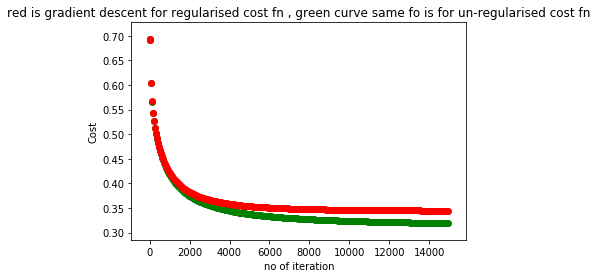

theta is  [[-0.62748908]
 [ 1.47212773]
 [-1.12379847]
 [ 0.26804188]
 [-1.00407015]
 [-0.07643602]
 [-0.6147776 ]
 [ 0.79311505]
 [-1.05263978]
 [ 0.17353636]
 [-0.44643912]
 [-0.54903501]
 [-0.47435436]
 [-0.74281248]
 [ 0.4235766 ]
 [-0.25626   ]
 [-0.30809369]
 [-0.74409499]
 [ 0.37463656]
 [-0.15568352]
 [ 0.81620552]
 [ 0.41233463]
 [-0.98232224]
 [-0.0441445 ]
 [-0.28732256]
 [-0.17354417]
 [-0.04037185]
 [-0.98917725]]


In [55]:
plt.scatter(lx,ly1,color="green") 
plt.scatter(lx,ly,color="red") 

plt.ylabel('Cost') 
# frequency label 
plt.xlabel('no of iteration') 
# plot title 
plt.title('red is gradient descent for regularised cost fn , green curve same fo is for un-regularised cost fn') 
plt.show()
print("theta is ",theta) 


In [59]:

print(X.shape)
print(Y.shape)
#print(x1[0])

(117, 28)
(117, 1)


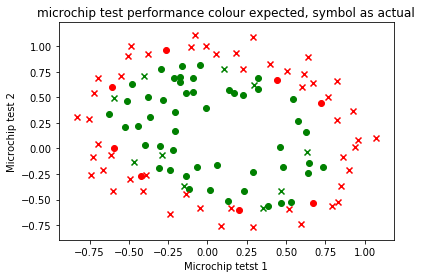

 x symbol show microchip rejected in actual ,o indicate chip is accepted in actual
 red colour show chip will be rejected as predicted , green indicate chip will be accepteted as predicted
 green cross  symbolise microchip has been rejected in actual but predicted as will be accepted


In [61]:

col=[]
syb=[]
temp=X.dot(theta)
predict=sigmoid(temp)
for u1 in range(0,m):
    if predict[u1] >= 0.5:
        col.append("green")
        
    else:
        col.append("red")
        
for u1 in range(0,m):
    if Y[u1] == 1:
        
        syb.append("o")
    else:
        
        syb.append("x")
for u in range(0,m) :   
         plt.scatter(xi[u], xj[u],color=col[u],marker=syb[u]) 

  
# x-axis label 
plt.xlabel('Microchip tetst 1') 
# frequency label 
plt.ylabel('Microchip test 2') 
# plot title 
plt.title('microchip test performance colour expected, symbol as actual') 
# showing legend 
#plt.legend() 
  
# function to show the plot 
plt.show() 
print(" x symbol show microchip rejected in actual ,o indicate chip is accepted in actual")
print(" red colour show chip will be rejected as predicted , green indicate chip will be accepteted as predicted")
print(" green cross  symbolise microchip has been rejected in actual but predicted as will be accepted")

In [78]:
#print(X)
print(div_normaliser)
print(sub_normaliser)
final_theta=theta
print("final theta value after training is ",final_theta)
para1,para2=eval(input(" Enter test1 result")),eval(input(" Exam test 2 result "))
'''print(par1,par2)
par1=(par1-sub_normaliser[0])/div_normaliser[0]
par2=(par2-sub_normaliser[1])/div_normaliser[1]
print("par1 = ",par1," par2 = ",par2)
pft=theta[0]+theta[1]*par1+theta[2]*par2
pft=float(sigmoid(pft))
'''
pft=theta[0]
indx=0
for p in range(0,7):
    for q in range(0,7):
                            #for i in range(0,n):   # nth column will not be included there are n column in X 0 to n-1
                        #for j in range(0,n):
        
            if p+q>6 or (p==0 and q==0):
                continue
           
                    #since fn is non linear we include various power of parameter
                                
            x1=np.power(para1,p)*np.power(para2,q)
            pft=pft+((x1-sub_normaliser[indx])/div_normaliser[indx])*theta[indx+1]
            
            #print("index ",indx)
            indx+=1
            
pft=float(sigmoid(pft))
print("probability of this chip being accepted  is ",pft)
if pft>=0.5:
    print("probably this chip will be accepted")
else:
    print("probably this chip you will be rejected")

[0.5175262986795829, 0.2840004508801804, 0.32560504693110676, 0.28149418890750905, 0.2990533429814793, 0.29644056548934744, 0.49665368354150713, 0.22400253291371508, 0.15014072497932238, 0.11670450552229454, 0.09993617985949078, 0.09061020547412849, 0.24748969190998177, 0.13467981982483465, 0.06805869282054648, 0.05849088925171276, 0.04342149935851572, 0.27459001240158926, 0.09673667683957195, 0.05455093594657734, 0.03744261667224423, 0.20896146593697063, 0.07226543504973103, 0.03425585888337497, 0.21475564492201893, 0.05827107844000473, 0.19372550670266814]
[0.17868738461538455, 0.2997626512456752, 0.1406405804831691, 0.17051390318198203, 0.11526661724753086, 0.12579841946565104, 0.054808924786324785, -0.025996081143999997, 0.01540040277126669, -0.01129262951920347, 0.004019090922548301, -0.006429083038191811, 0.24966889961158048, 0.030928053809590215, 0.050852930986605434, 0.018426338390403623, 0.022779409702833764, 0.060343573337082214, -0.0052967244390051136, 0.009512147040295807, 